# 1.Importing Libraries

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)

# 2.Choosing Best Model with LazyClassifier

In [31]:
df = pd.read_csv("latest_data.csv")

In [32]:
df

,Positioning,Rank,Player Name,OVR,PAC,SHO,PAS,DRİ,DEF,PHY,Position,Acceleration,Sprint Speed,Finishing,Shot Power,Long Shots,Volleys,Penalties,Vision,Crossing,Free Kick Accuracy,Shot Passing,Long Passing,Curve,Agility,Balance,Reactions,Ball Control,Detailed Dribbling,Composure,Interception,Heading Accuracy,Def Awareness,Standing Tackle,Sliding Tackle,Jumping,Stamina,Strength,Aggression,Age,Att_Work_Rate,Def_Work_Rate,Age.1,Foot,Height,League,Nation,Team,Weight
0,93,1,Kylian Mbappé,91,97,90,80,92,36,78,ST,97,97,94,90,83,84,84,83,78,69,86,71,80,93,82,93,92,93,88,38,73,26,34,32,88,88,77,64,24,High,Low,24,Right,18,Ligue 1 Uber Eats,France,Paris SG,75
1,91,2,Alexia Putellas,91,82,90,91,92,72,78,CM,81,82,91,86,89,90,91,91,88,89,94,91,89,90,89,92,94,92,92,78,74,60,81,64,84,85,78,70,29,High,Medium,29,Left,17,Liga F,Spain,FC Barcelona,67
2,96,3,Erling Haaland,91,89,93,66,80,45,88,ST,82,94,96,94,86,90,84,74,47,62,77,53,77,76,72,94,82,79,87,43,83,38,47,29,93,76,93,87,23,High,Medium,23,Left,19,Premier League,Norway,Manchester City,94
3,88,4,Kevin De Bruyne,91,72,88,94,87,65,78,CM,72,72,85,92,92,83,83,95,95,83,94,94,92,74,78,92,92,86,88,66,55,66,70,53,72,88,74,75,32,High,Medium,32,Right,18,Premier League,Belgium,Manchester City,75
4,91,5,Aitana Bonmatí,90,81,84,83,91,75,73,CM,82,80,91,69,89,62,70,90,67,67,91,87,76,93,86,91,91,91,85,88,54,70,81,67,75,80,75,60,25,High,High,25,Right,16,Liga F,Spain,FC Barcelona,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17321,41,173,Deven Sawhney,47,62,26,34,42,43,57,LB,64,61,24,25,27,25,34,36,37,34,33,28,31,57,64,39,35,41,36,41,35,40,48,47,45,57,57,58,21,High,Medium,21,Left,17,Hero ISL,India,Odisha FC,70
17322,38,173,Wang Tengda,47,61,37,45,48,43,47,CM,61,61,38,38,37,32,35,46,35,35,53,48,30,61,74,48,45,45,39,48,49,35,46,44,38,56,42,51,22,Medium,Medium,22,Right,17,CSL,China PR,Dalian Pro,66
17323,37,173,Wu Yuhang,47,56,34,43,45,43,51,CDM,51,60,31,40,32,26,41,35,35,34,51,50,32,57,60,45,42,43,39,43,42,40,45,51,38,49,51,56,22,Medium,Medium,22,Right,18,CSL,China PR,Zhejiang Pro,75
17324,28,173,Ye Daoxin,47,58,28,33,39,49,48,CB,61,55,25,38,24,26,33,32,26,28,41,28,22,48,73,51,29,38,36,46,42,52,50,46,38,50,48,46,18,Medium,Medium,18,Right,17,CSL,China PR,Zhejiang Pro,70


In [33]:
selected_columns = ["Position", "PAC", "SHO", "PAS", "DRİ", "DEF", "PHY", "OVR","Age","Att_Work_Rate","Def_Work_Rate","Foot","Height","Weight"]
df_new = df[selected_columns]

In [34]:
df_new

,Position,PAC,SHO,PAS,DRİ,DEF,PHY,OVR,Age,Att_Work_Rate,Def_Work_Rate,Foot,Height,Weight
0,ST,97,90,80,92,36,78,91,24,High,Low,Right,18,75
1,CM,82,90,91,92,72,78,91,29,High,Medium,Left,17,67
2,ST,89,93,66,80,45,88,91,23,High,Medium,Left,19,94
3,CM,72,88,94,87,65,78,91,32,High,Medium,Right,18,75
4,CM,81,84,83,91,75,73,90,25,High,High,Right,16,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17321,LB,62,26,34,42,43,57,47,21,High,Medium,Left,17,70
17322,CM,61,37,45,48,43,47,47,22,Medium,Medium,Right,17,66
17323,CDM,56,34,43,45,43,51,47,22,Medium,Medium,Right,18,75
17324,CB,58,28,33,39,49,48,47,18,Medium,Medium,Right,17,70


In [35]:
df_new["Att_Work_Rate"].unique()

array(['High', 'Low', 'Medium'], dtype=object)

In [36]:
df_new["Def_Work_Rate"].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [37]:
df_new["Att_Work_Rate"].head(10)

0      High
1      High
2      High
3      High
4      High
5       Low
6      High
7    Medium
8    Medium
9      High
Name: Att_Work_Rate, dtype: object

In [38]:
df_new["Foot"].head()

0    Right
1     Left
2     Left
3    Right
4    Right
Name: Foot, dtype: object

In [39]:
label_encoder = LabelEncoder()
df_new['Foot'] = label_encoder.fit_transform(df_new["Foot"])
df_new["Foot"].head()

0    1
1    0
2    0
3    1
4    1
Name: Foot, dtype: int32

In [40]:
# Sıralama önceliğini belirleyin
priority_order = ['Low','Medium','High']

# Label encoding için özel bir fonksiyon tanımlayın
def custom_label_encoding(value):
    return priority_order.index(value)

# 'Def_Work_Rate' sütununa özel label encoding uygulayın
df_new['Att_Work_Rate'] = df_new['Att_Work_Rate'].apply(lambda x: custom_label_encoding(x) if x in priority_order else x)


# DataFrame'i gösterin (kalıcı değişiklik yapıldı)
df_new['Att_Work_Rate'].head(10)

0    2
1    2
2    2
3    2
4    2
5    0
6    2
7    1
8    1
9    2
Name: Att_Work_Rate, dtype: int64

In [41]:
# Sıralama önceliğini belirleyin
priority_order = ['Low','Medium','High']

# Label encoding için özel bir fonksiyon tanımlayın
def custom_label_encoding(value):
    return priority_order.index(value)

# 'Def_Work_Rate' sütununa özel label encoding uygulayın
df_new['Def_Work_Rate'] = df_new['Def_Work_Rate'].apply(lambda x: custom_label_encoding(x) if x in priority_order else x)


# DataFrame'i gösterin (kalıcı değişiklik yapıldı)
df_new['Def_Work_Rate'].head()

0    0
1    1
2    1
3    1
4    2
Name: Def_Work_Rate, dtype: int64

In [42]:
label_encoder = LabelEncoder()
df_new['Position'] = label_encoder.fit_transform(df_new["Position"])
df_new["Position"].head()

0    14
1     4
2    14
3     4
4     4
Name: Position, dtype: int32

In [43]:
df_new.head()

,Position,PAC,SHO,PAS,DRİ,DEF,PHY,OVR,Age,Att_Work_Rate,Def_Work_Rate,Foot,Height,Weight
0,14,97,90,80,92,36,78,91,24,2,0,1,18,75
1,4,82,90,91,92,72,78,91,29,2,1,0,17,67
2,14,89,93,66,80,45,88,91,23,2,1,0,19,94
3,4,72,88,94,87,65,78,91,32,2,1,1,18,75
4,4,81,84,83,91,75,73,90,25,2,2,1,16,51


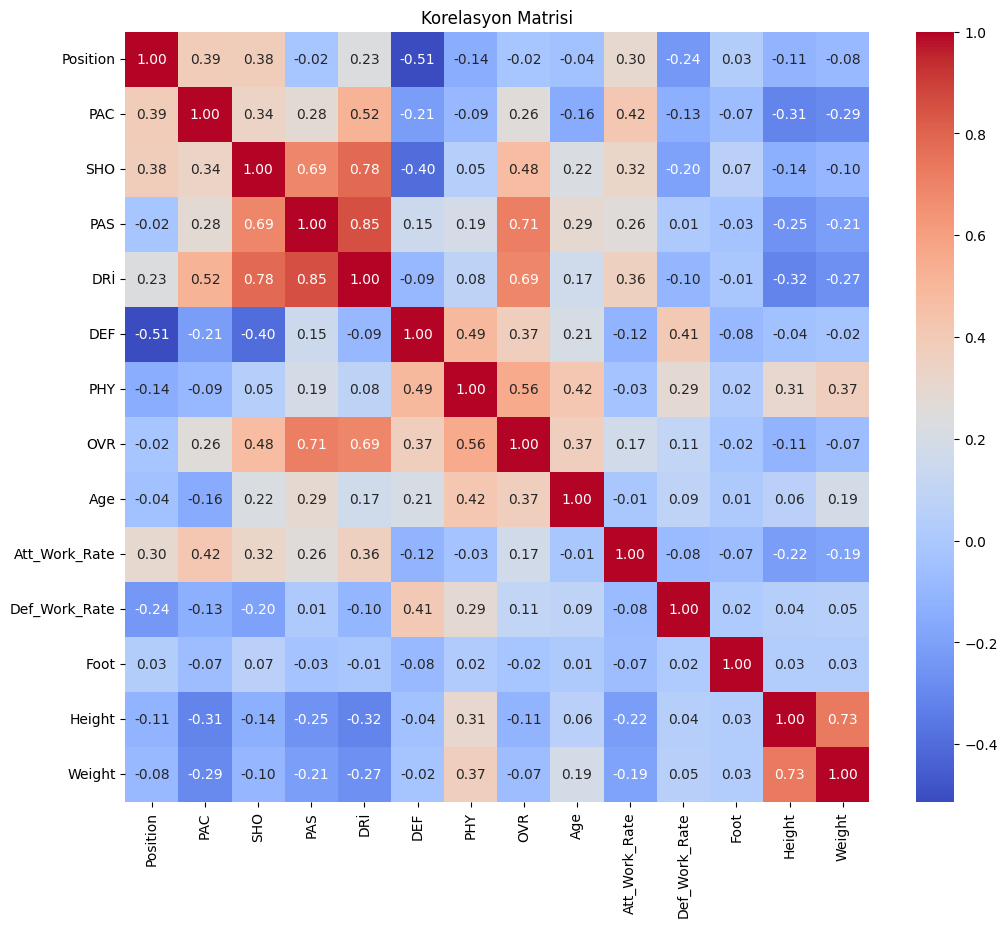

In [44]:
# Korelasyon matrisini hesaplayalım
correlation_matrix = df_new.corr()
plt.figure(figsize=(12, 10))

# Korelasyon matrisini çizdirelim
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasyon Matrisi')
plt.show()

In [45]:
X = df_new.drop(["Position"],axis=1)
y = df_new["Position"]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# LazyClassifier'ı kullanarak modelleri eğitin
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Modelleri ve tahmin sonuçlarını yazdırın
print(models)


  0%|          | 0/29 [00:00<?, ?it/s]

 97%|█████████▋| 28/29 [01:53<00:04,  4.09s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000845 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 548
[LightGBM] [Info] Number of data points in the train set: 13860, number of used features: 13
[LightGBM] [Info] Start training from score -2.903444
[LightGBM] [Info] Start training from score -1.718734
[LightGBM] [Info] Start training from score -2.506789
[LightGBM] [Info] Start training from score -5.070854
[LightGBM] [Info] Start training from score -2.094270
[LightGBM] [Info] Start training from score -2.183040
[LightGBM] [Info] Start training from score -2.746665
[LightGBM] [Info] Start training from score -2.974318
[LightGBM] [Info] Start training from score -3.800190
[LightGBM] [Info] Start training from score -4.184904
[LightGBM] [Info] Start training from score -2.737706
[LightGBM] [Info] Start training from score -2.991413


100%|██████████| 29/29 [01:58<00:00,  4.09s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  Time Taken
Model                                                                                   
LGBMClassifier                     0.68               0.46    None      0.66        4.91
XGBClassifier                      0.68               0.46    None      0.66        5.40
SVC                                0.68               0.45    None      0.65       15.27
LogisticRegression                 0.67               0.45    None      0.64        1.25
QuadraticDiscriminantAnalysis      0.61               0.44    None      0.59        0.12
RandomForestClassifier             0.67               0.44    None      0.64        7.20
LinearDiscriminantAnalysis         0.64               0.43    None      0.61        0.56
ExtraTreesClassifier               0.66               0.43    None      0.63        6.20
CalibratedClassifierCV             0.66               0.43    None      0.62        5.09
LinearSVC            

In [48]:
df["Position"].unique()

array(['ST', 'CM', 'CF', 'GK', 'RW', 'CB', 'LW', 'CDM', 'CAM', 'LB', 'RB',
       'RM', 'LM', 'LWB', 'RWB'], dtype=object)

In [49]:
df_new["Position"].unique()

array([14,  4,  3,  5, 12,  1,  8,  2,  0,  6, 10, 11,  7,  9, 13])

In [50]:
#Bilgilendirme:
"""
CAM (Central Attacking Midfielder (Merkez Ofansif Orta Saha)) = 0
CB (Center Back (Stoper)) = 1
CDM (Central Defensive Midfielder (Merkez Defansif Orta Saha) = 2
CF(Center Forward (Forvet) - Santrafor) = 3
CM (Central Midfielder (Merkez Orta Saha)) = 4
GK (Goalkeeper (Kaleci))= 5
LB ( Left Back (Sol Bek))= 6
LM ( Left Midfielder (Sol Orta Saha))= 7
LW (Left Winger (Sol Kanat)) = 8
LWB (Left Wing Back (Sol Kanat Bek)) = 9
RB (Right Back (Sağ Bek))= 10
RM (Right Midfielder (Sağ Orta Saha)) = 11
RW (Right Winger (Sağ Kanat))= 12
RWB (Right Wing Back (Sağ Kanat Bek))= 13
ST (Striker (Forvet))= 14

"""

'\nCAM (Central Attacking Midfielder (Merkez Ofansif Orta Saha)) = 0\nCB (Center Back (Stoper)) = 1\nCDM (Central Defensive Midfielder (Merkez Defansif Orta Saha) = 2\nCF(Center Forward (Forvet) - Santrafor) = 3\nCM (Central Midfielder (Merkez Orta Saha)) = 4\nGK (Goalkeeper (Kaleci))= 5\nLB ( Left Back (Sol Bek))= 6\nLM ( Left Midfielder (Sol Orta Saha))= 7\nLW (Left Winger (Sol Kanat)) = 8\nLWB (Left Wing Back (Sol Kanat Bek)) = 9\nRB (Right Back (Sağ Bek))= 10\nRM (Right Midfielder (Sağ Orta Saha)) = 11\nRW (Right Winger (Sağ Kanat))= 12\nRWB (Right Wing Back (Sağ Kanat Bek))= 13\nST (Striker (Forvet))= 14\n\n'

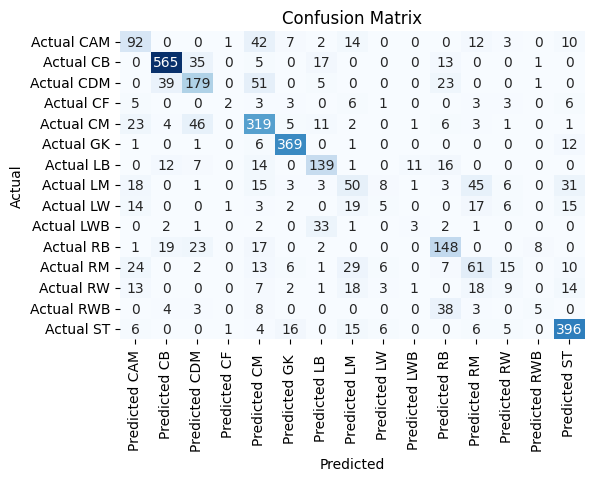

In [51]:
# XGBoost modelini oluşturma
model = XGBClassifier()

# Modeli eğitme
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Confusion matrix oluşturma
cm = confusion_matrix(y_test, y_pred)

# Görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted CAM","Predicted CB","Predicted CDM","Predicted CF","Predicted CM ","Predicted GK ",
                         "Predicted LB ","Predicted LM ","Predicted LW","Predicted LWB","Predicted RB",
                         "Predicted RM ","Predicted RW","Predicted RWB","Predicted ST"],
            yticklabels=["Actual CAM","Actual CB","Actual CDM","Actual CF","Actual CM","Actual GK",
                        "Actual LB","Actual LM","Actual LW","Actual LWB","Actual RB",
                         "Actual RM","Actual RW","Actual RWB","Actual ST"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [52]:
# Model performansını değerlendirme
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')  # micro, macro, weighted gibi değerler kullanılabilir
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

model_name = "XGBoost Model"
print(f'Model Name: {model_name}')
print(f'Model Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Sınıflandırma raporu
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Name: XGBoost Model
Model Accuracy: 0.6757068667051356
Precision: 0.6757068667051356
Recall: 0.6757068667051356
F1 Score: 0.6757068667051356

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.50      0.48       183
           1       0.88      0.89      0.88       636
           2       0.60      0.60      0.60       298
           3       0.40      0.06      0.11        32
           4       0.63      0.76      0.69       422
           5       0.89      0.95      0.92       390
           6       0.65      0.69      0.67       200
           7       0.32      0.27      0.29       184
           8       0.17      0.06      0.09        82
           9       0.18      0.07      0.10        45
          10       0.58      0.68      0.62       218
          11       0.36      0.35      0.36       174
          12       0.19      0.10      0.13        86
          13       0.33      0.08      0.13        61
          14      